In [26]:
import pandas as pd

# Data extracted from the screenshot
data = {
    'age': ['<=30', '<=30', '31..40', '>40', '>40', '>40', '31..40', '<=30', '<=30', '>40', '<=30', '31..40', '31..40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)
print(df.head())

      age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2  31..40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes


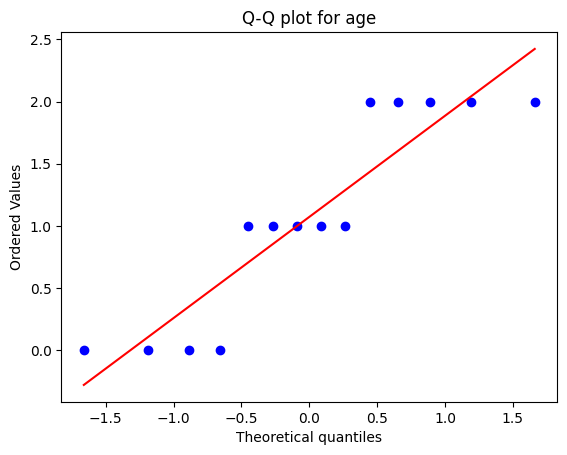

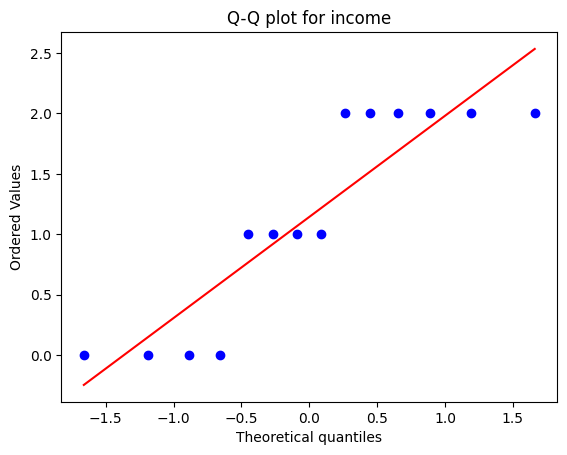

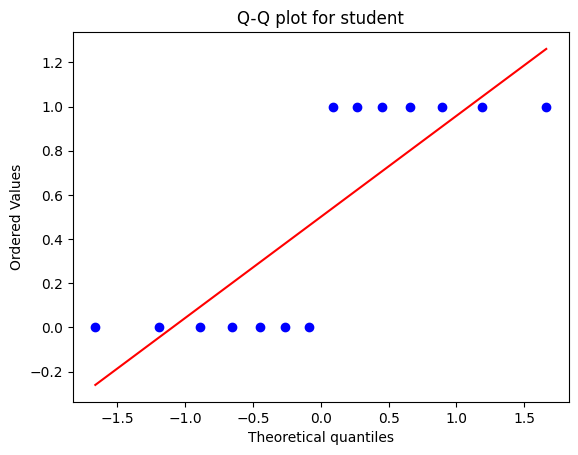

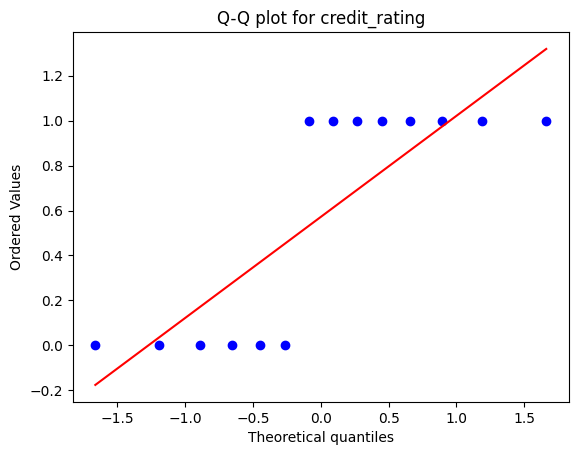

In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Encode categorical data
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Q-Q Plot for each column
plt.figure(facecolor='white')
for column in df.columns[:-1]:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot for ' + column)
    plt.show()



In [28]:
# Descriptive statistics
max_values = df.max()
min_values = df.min()
median_values = df.median()
mode_values = df.mode().iloc[0]

print('Max Values:', max_values, '')
print('Min Values:', min_values, '')
print('Median Values:', median_values, '')
print('Mode Values:', mode_values, '')

Max Values: age              2
income           2
student          1
credit_rating    1
buys_computer    1
dtype: int32 
Min Values: age              0
income           0
student          0
credit_rating    0
buys_computer    0
dtype: int32 
Median Values: age              1.0
income           1.0
student          0.5
credit_rating    1.0
buys_computer    1.0
dtype: float64 
Mode Values: age              1.0
income           2.0
student          0.0
credit_rating    1.0
buys_computer    1.0
Name: 0, dtype: float64 


In [37]:
# Building a decision tree using ID3 algorithm
# Splitting the dataset
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predictions for the given records
records = pd.DataFrame({
    'age': [1, 2, 0], # '31..40' -> 1, '>40' -> 2, '<=30' -> 0
    'income': [1, 0, 2], # 'medium' -> 1, 'high' -> 0, 'low' -> 2
    'student': [1, 0, 0], # 'yes' -> 1, 'no' -> 0
    'credit_rating': [0, 0, 1] # 'fair' -> 0, 'excellent' -> 1
})
predictions = clf.predict(records)

# Encoding back to original labels
predictions_labels = le.inverse_transform(predictions)

print('Predictions for buys_computer:', predictions_labels)

Predictions for buys_computer: ['yes' 'no' 'yes']


In [36]:
from sklearn.naive_bayes import GaussianNB

# Training the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


predictions = gnb.predict(records)

# Encoding back to original labels
predictions_labels = le.inverse_transform(predictions)

print('Predictions for buys_computer:', predictions_labels)

Predictions for buys_computer: ['yes' 'no' 'no']


In [35]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(solver='saga', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(records)

# Encoding back to original labels
predictions_labels = le.inverse_transform(predictions)

print('Predictions for buys_computer:', predictions_labels)

Predictions for buys_computer: ['yes' 'no' 'yes']


In [31]:
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import graphviz

# # Encoding categorical variables
# le = LabelEncoder()
# df['age'] = le.fit_transform(df['age'])
# df['income'] = le.fit_transform(df['income'])
# df['student'] = le.fit_transform(df['student'])
# df['credit_rating'] = le.fit_transform(df['credit_rating'])
# df['buys_computer'] = le.fit_transform(df['buys_computer'])

# # Building a decision tree using ID3 algorithm
# # Splitting the dataset
# X = df.drop('buys_computer', axis=1)
# y = df['buys_computer']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Training the model
# clf = DecisionTreeClassifier(criterion='entropy')
# clf.fit(X_train, y_train)

# Generate DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['No', 'Yes'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree")

# # Display the decision tree
# graph.view()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Ý 2

In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data extracted from the image
data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)
print(df.head())
# # Encode categorical variables
# for column in df.columns[:-1]:
#     df[column] = df[column].astype('category').cat.codes

# # Convert boolean to int
# df['Windy'] = df['Windy'].astype(int)

# print('Data preparation done.')

    Outlook  Temp Humidity  Windy Play Golf
0     Rainy   Hot     High  False        No
1     Rainy   Hot     High   True        No
2  Overcast   Hot     High  False       Yes
3     Sunny  Mild     High  False       Yes
4     Sunny  Cool   Normal  False       Yes


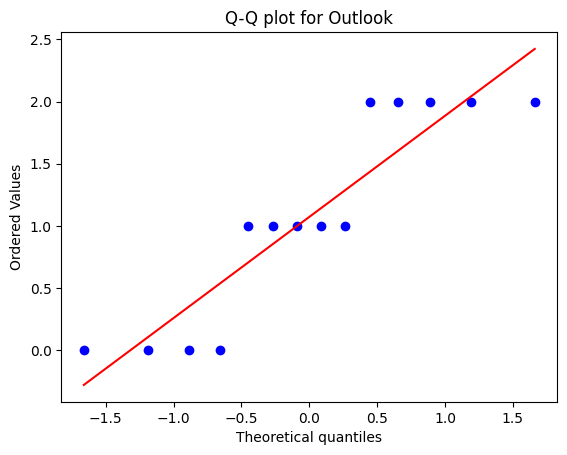

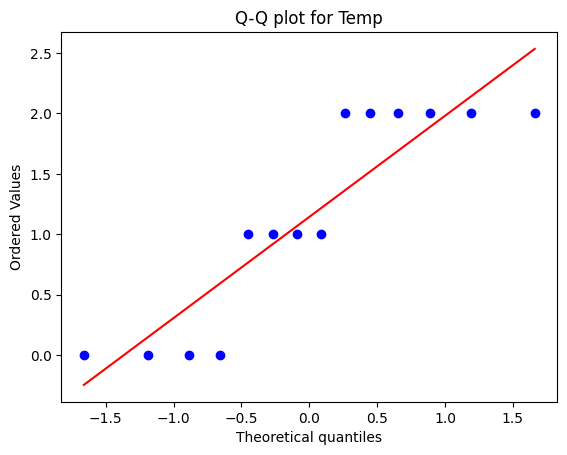

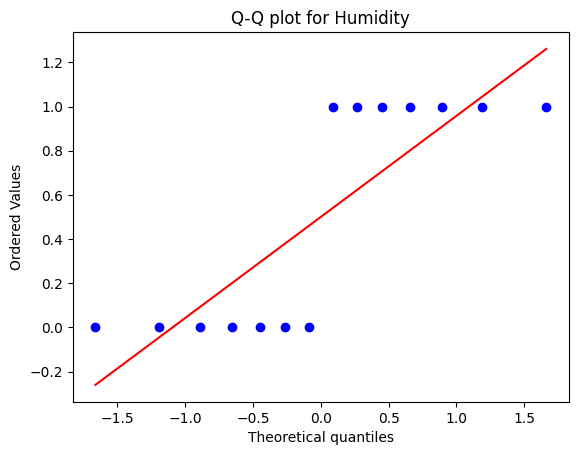

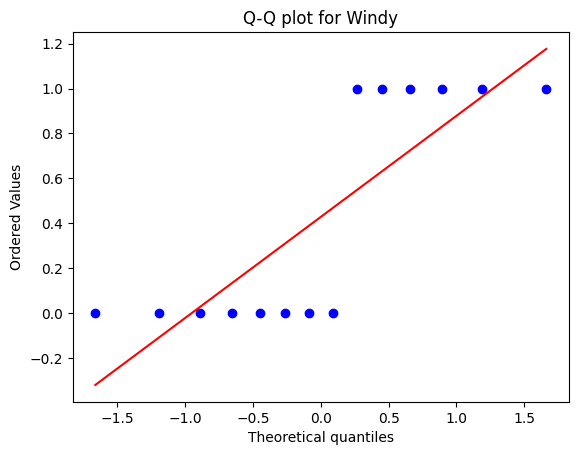

In [46]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Encode categorical data
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Q-Q Plot for each column
plt.figure(facecolor='white')
for column in df.columns[:-1]:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot for ' + column)
    plt.show()


In [42]:
# Descriptive statistics
max_values = df.max()
min_values = df.min()
median_values = df.median()
mode_values = df.mode().iloc[0]

print('Max Values:', max_values, '')
print('Min Values:', min_values, '')
print('Median Values:', median_values, '')
print('Mode Values:', mode_values, '')

Max Values: Outlook      2
Temp         2
Humidity     1
Windy        1
Play Golf    1
dtype: int64 
Min Values: Outlook      0
Temp         0
Humidity     0
Windy        0
Play Golf    0
dtype: int64 
Median Values: Outlook      1.0
Temp         1.0
Humidity     0.5
Windy        0.0
Play Golf    1.0
dtype: float64 
Mode Values: Outlook      1.0
Temp         2.0
Humidity     0.0
Windy        0.0
Play Golf    1.0
Name: 0, dtype: float64 


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Generate DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree")


ValueError: Input contains NaN

In [47]:
X = df.drop('Play Golf', axis=1)
y = df['Play Golf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predictions for the given records
records = pd.DataFrame({
    'Outlook': [1, 2, 0], # 'Overcast' -> 1, 'Sunny' -> 2, 'Rainy' -> 0
    'Temp': [1, 0, 2], # 'Mild' -> 1, 'Hot' -> 0, 'Cool' -> 2
    'Humidity': [1, 0, 0], # 'High' -> 1, 'Normal' -> 0
    'Windy': [0, 0, 1] # 'False' -> 0, 'True' -> 1
})


predictions = clf.predict(records)

# Encoding back to original labels
predictions_labels = le.inverse_transform(predictions)

print('Predictions for buys_computer:', predictions_labels)

Predictions for buys_computer: ['Yes' 'Yes' 'No']


In [49]:
from sklearn.naive_bayes import GaussianNB

# Training the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


predictions = gnb.predict(records)

# Encoding back to original labels
predictions_labels = le.inverse_transform(predictions)

print('Predictions for buys_computer:', predictions_labels)

Predictions for buys_computer: ['Yes' 'No' 'No']


In [50]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(solver='saga', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(records)

# Encoding back to original labels
predictions_labels = le.inverse_transform(predictions)

print('Predictions for buys_computer:', predictions_labels)

Predictions for buys_computer: ['Yes' 'Yes' 'No']
